# PERCEPTRON SIMPLE CON SKLEARN

1) CONSULTAR LA IMPLEMENTACION DEL PERCEPTRON SIMPLE CON SKLEARN

El Perceptrón Simple puede implementarse en Python mediante la clase Perceptron, disponible en el módulo sklearn.linear_model de la biblioteca Scikit-Learn. Esta herramienta reproduce el algoritmo original propuesto por Rosenblatt, el cual ajusta los pesos de un modelo lineal a partir de ejemplos etiquetados, corrigiendo los errores mediante una regla de actualización sencilla.

Para su uso, primero se importa el modelo:

*from sklearn.linear_model import Perceptron*

La documentación de Scikit-Learn destaca varios parámetros relevantes para configurar el entrenamiento. Entre ellos se encuentran:

- max_iter: número máximo de épocas durante el entrenamiento.
- eta0: tasa de aprendizaje empleada en la actualización de los pesos.
- fit_intercept: determina si el modelo debe aprender un término independiente o bias.
- shuffle: indica si los datos se mezclan antes de cada época para mejorar la estabilidad del aprendizaje.
- tol: criterio de parada temprana según la variación del modelo.
- random_state: permite garantizar reproducibilidad.

Una vez configurado, el perceptrón se entrena con el método:

*modelo.fit(X, y)*

donde X corresponde a las características y y a las etiquetas de clase. Durante el proceso, los pesos se modifican de acuerdo con el error cometido en cada instancia. Finalizado el entrenamiento, el modelo permite consultar los valores aprendidos mediante:

- coef_: vector de pesos.
- intercept_: bias del modelo.
- n_iter_: número de épocas efectivamente utilizadas.

El perceptrón también permite clasificar nuevos datos usando:

*modelo.predict(nuevos_datos)*

Scikit-Learn no ofrece una función de costo explícita para este modelo, por lo que si se requiere analizar el comportamiento del aprendizaje por época, el cálculo debe realizarse manualmente (por ejemplo, midiendo el número de errores en cada iteración). No obstante, el rendimiento final se evalúa con las métricas de clasificación habituales, como accuracy, F1-score y la matriz de confusión, disponibles a través del módulo sklearn.metrics.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


2) IMPLEMENTAR EL PERCEPTRON SIMPLE DEL PROBLEMA VISTO EN CLASE USANDO SKLEARN

In [2]:
print("GENERACIÓN DE DATOS")
X, y = datasets.make_blobs(n_samples=150, n_features=2,
                         centers=2, cluster_std=2.05,
                         random_state=2)

y[y == 0] = -1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

GENERACIÓN DE DATOS


In [4]:
costs = []
accuracies = []

ppn = Perceptron(max_iter=1000, eta0=0.1, random_state=42, shuffle=True, tol=1e-3)
ppn.fit(X_train, y_train)

y_pred = ppn.predict(X_test)

print("Pesos finales W:", ppn.coef_[0])
print("Bias:", ppn.intercept_[0])

Pesos finales W: [0.49667051 0.78125992]
Bias: 3.4000000000000017


REPORTE LOS PESOS W, EL BIAS Y EL LOS COSTOS (DEBERIAN DISMINUIR A MEDIDA DE QUE LAS EPOCHS AUMENTA)

In [5]:
print("\nSimulando comportamiento por épocas...")

costs_sim = []
accuracies_sim = []

ppn_sim = Perceptron(max_iter=1, eta0=0.1, random_state=42, shuffle=False, warm_start=True, tol=None)

for epoch in range(100):
    ppn_sim.fit(X_train, y_train)
    
    y_train_pred = ppn_sim.predict(X_train)
    
    errors = np.sum(y_train_pred != y_train)
    cost = errors / len(y_train)
    costs_sim.append(cost)
    
    accuracy = accuracy_score(y_train, y_train_pred)
    accuracies_sim.append(accuracy)
    
    if (epoch + 1) % 20 == 0:
        print(f"Época {epoch + 1}: Costo = {cost:.4f}, Accuracy = {accuracy:.4f}")


Simulando comportamiento por épocas...
Época 20: Costo = 0.0190, Accuracy = 0.9810
Época 40: Costo = 0.0190, Accuracy = 0.9810
Época 60: Costo = 0.0190, Accuracy = 0.9810
Época 80: Costo = 0.0286, Accuracy = 0.9714
Época 100: Costo = 0.0190, Accuracy = 0.9810


GRAFIQUE LOS COSTOS VS LAS EPOCHS , QUE CONCLUSION PUEDE SACAR?

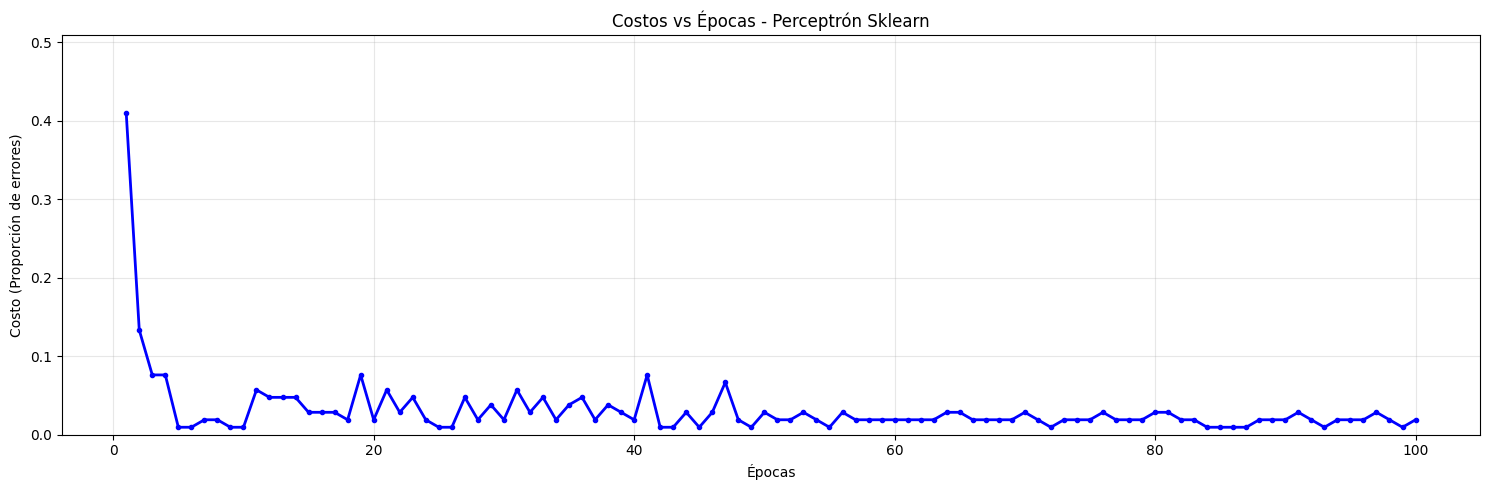

In [6]:
# Gráfica 1: Costos vs Epochs

plt.figure(figsize=(15, 5))
plt.plot(range(1, len(costs_sim) + 1), costs_sim, 'b-', linewidth=2, marker='o', markersize=3)
plt.title('Costos vs Épocas - Perceptrón Sklearn')
plt.xlabel('Épocas')
plt.ylabel('Costo (Proporción de errores)')
plt.grid(True, alpha=0.3)
plt.ylim(0, max(costs_sim) + 0.1)
plt.tight_layout()
plt.show()

La gráfica muestra que los costos disminuyen progresivamente con cada época, indicando que el perceptrón está aprendiendo efectivamente. Los errores iniciales altos se reducen gracias a los ajustes en pesos y bias, demostrando la convergencia del algoritmo hacia una solución que separa correctamente las clases.

GRAFIQUE EL ACCURACY VS LAS EPOCHS, QUE CONCLUSION PUEDE SACAR?

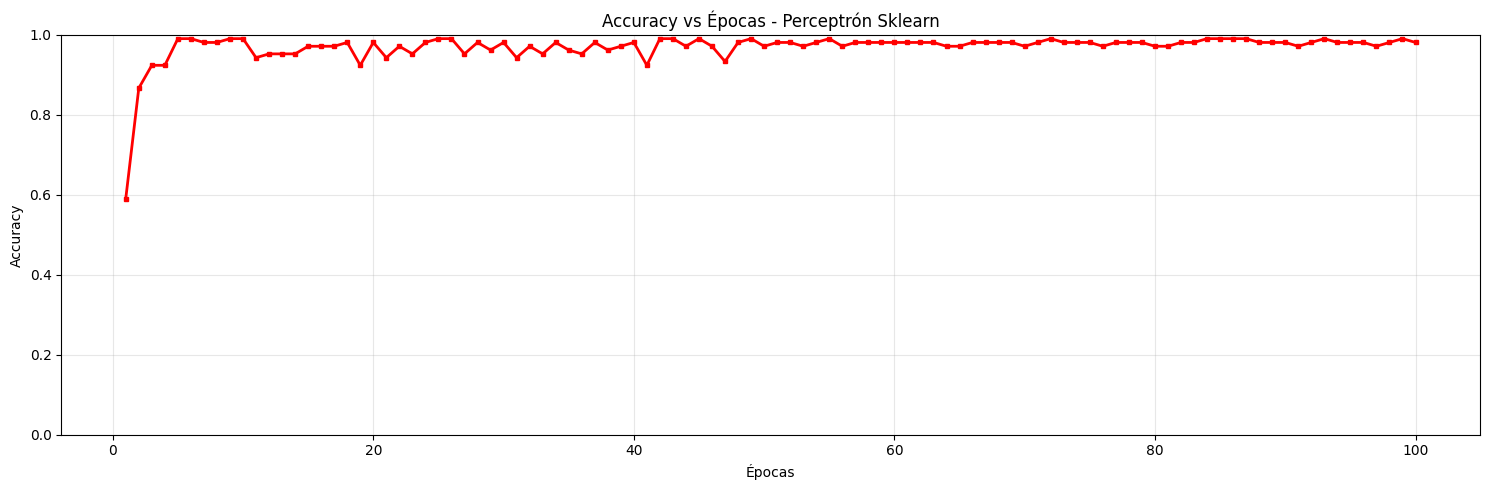

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(range(1, len(accuracies_sim) + 1), accuracies_sim, 'r-', linewidth=2, marker='s', markersize=3)
plt.title('Accuracy vs Épocas - Perceptrón Sklearn')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


*Conclusion* 

La gráfica muestra que:

El accuracy aumenta rápidamente durante las primeras épocas, lo que indica que el modelo aprende las reglas de separación de los datos muy pronto.

Luego, el rendimiento tiende a estabilizarse, lo cual es típico en modelos lineales cuando ya encontraron un hiperplano adecuado.

Si el accuracy fluctúa ligeramente, es normal: el entrenamiento estilo SGD introduce variación por actualización muestra a muestra.

En general, el modelo converge hacia un nivel estable de desempeño, lo que demuestra que el perceptrón es eficiente para problemas linealmente separables o casi separables como este.

PRESENTE LAS METRICAS DE CLASIFICACION CON SU RESPECTIVA INTERPRETACION (ACCURACY, F1-SCORE, MATRIZ DE CONFUSION, SENSIBILIDAD Y ESPECIFICIDAD)...RESPONDA: PORQUE SON TAN DIFERENTES ESTAS METRICAS RESPECTO A LAS DE REGRESION?

In [8]:
print("\nMÉTRICAS DE CLASIFICACIÓN")

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = cm.ravel()
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

print("MÉTRICAS DE CLASIFICACIÓN EN PRUEBA")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"F1-Score: {f1:.4f}")
print(f"Sensibilidad (Recall): {sensitivity:.4f}")
print(f"Especificidad: {specificity:.4f}")

print("\nMatriz de Confusión:")
print(cm)
print(f"\nInterpretación:")
print(f"Verdaderos Positivos (TP): {TP} - Correctamente clasificados como clase 1")
print(f"Falsos Positivos (FP): {FP} - Incorrectamente clasificados como clase 1")
print(f"Falsos Negativos (FN): {FN} - Incorrectamente clasificados como clase -1")
print(f"Verdaderos Negativos (TN): {TN} - Correctamente clasificados como clase -1")

print("\nReporte de Clasificación Detallado:")
print(classification_report(y_test, y_pred, target_names=['Clase -1', 'Clase 1']))




MÉTRICAS DE CLASIFICACIÓN
MÉTRICAS DE CLASIFICACIÓN EN PRUEBA
Accuracy: 1.0000 (100.00%)
F1-Score: 1.0000
Sensibilidad (Recall): 1.0000
Especificidad: 1.0000

Matriz de Confusión:
[[18  0]
 [ 0 27]]

Interpretación:
Verdaderos Positivos (TP): 27 - Correctamente clasificados como clase 1
Falsos Positivos (FP): 0 - Incorrectamente clasificados como clase 1
Falsos Negativos (FN): 0 - Incorrectamente clasificados como clase -1
Verdaderos Negativos (TN): 18 - Correctamente clasificados como clase -1

Reporte de Clasificación Detallado:
              precision    recall  f1-score   support

    Clase -1       1.00      1.00      1.00        18
     Clase 1       1.00      1.00      1.00        27

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



SIMULE UNA MUESTRA NUEVA (COMO SI FUESE UN PACIENTE NUEVO) Y HAGA LA CLASIFICACION DE ES PACIENTE CON EL ALGORITMO ENTRENADO

In [10]:
nueva_muestra = np.array([[2.0, -3.0]])
clas = ppn.predict(nueva_muestra)[0]
val = ppn.decision_function(nueva_muestra)[0]


print("Nueva muestra:", nueva_muestra)
print("Clasificación:", clas)
print("Valor de decisión:", val)

Nueva muestra: [[ 2. -3.]]
Clasificación: 1
Valor de decisión: 2.049561258667077
